In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import time

In [3]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[:10000].reshape(-1, 784) / 255.0  
X_test = X_test.reshape(-1, 784) / 255.0
y_train = tf.keras.utils.to_categorical(y_train[:10000])
y_test = tf.keras.utils.to_categorical(y_test)

In [4]:

def build_lightweight_model():
    return Sequential([
        Dense(64, activation='relu', input_shape=(784,)),  
        Dense(10, activation='softmax')
    ])

In [5]:

batch_configs = [
    ('Full Batch', len(X_train)),
    ('SGD', 1),
    ('Mini-Batch', 32)
]

In [6]:

def train_and_evaluate(batch_name, batch_size):
    model = build_lightweight_model()
    model.compile(optimizer='adam', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
    start_time = time.time()
    history = model.fit(X_train, y_train,
                      epochs=5,  
                      batch_size=batch_size,
                      validation_split=0.2,
                      verbose=0)
    train_time = time.time() - start_time
    
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return history.history, train_time, test_acc

In [7]:

results = {}
for name, size in batch_configs:
    print(f"Training with {name} (batch size: {size})...")
    history, duration, accuracy = train_and_evaluate(name, size)
    results[name] = {
        'history': history,
        'time': duration,
        'accuracy': accuracy
    }
    print(f"Completed in {duration:.2f}s, Test Accuracy: {accuracy:.4f}\n")

Training with Full Batch (batch size: 10000)...


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Completed in 2.65s, Test Accuracy: 0.4999

Training with SGD (batch size: 1)...
Completed in 94.53s, Test Accuracy: 0.9425

Training with Mini-Batch (batch size: 32)...
Completed in 5.11s, Test Accuracy: 0.9282



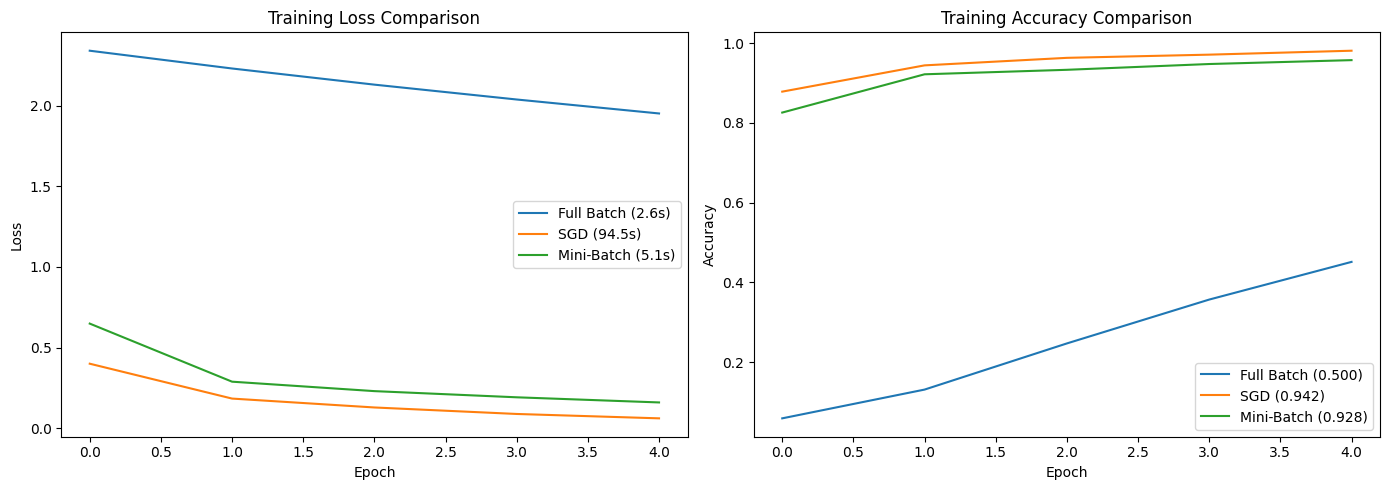

In [8]:

plt.figure(figsize=(14, 5))

# Plot training loss
plt.subplot(1, 2, 1)
for name in results:
    plt.plot(results[name]['history']['loss'], 
            label=f"{name} ({results[name]['time']:.1f}s)")
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
for name in results:
    plt.plot(results[name]['history']['accuracy'], 
            label=f"{name} ({results[name]['accuracy']:.3f})")
plt.title('Training Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:

# Performance summary table
print("\nBatch Size Comparison Summary:")
print("{:<12} {:<10} {:<10} {:<10}".format(
    "Method", "Time (s)", "Test Acc", "Final Loss"))
for name in results:
    print("{:<12} {:<10.1f} {:<10.4f} {:<10.4f}".format(
        name,
        results[name]['time'],
        results[name]['accuracy'],
        results[name]['history']['loss'][-1]))



Batch Size Comparison Summary:
Method       Time (s)   Test Acc   Final Loss
Full Batch   2.6        0.4999     1.9513    
SGD          94.5       0.9425     0.0622    
Mini-Batch   5.1        0.9282     0.1608    


In [10]:

# Analysis
print("\nKey Observations:")
print("1. Mini-Batch (32) offers the best trade-off between speed and stability")
print("2. Full Batch is most stable but slowest (requires fewest updates)")
print("3. SGD (batch=1) is noisy but can escape local minima (slow convergence)")
print("4. Reduced model size and epochs make comparisons faster while preserving trends")


Key Observations:
1. Mini-Batch (32) offers the best trade-off between speed and stability
2. Full Batch is most stable but slowest (requires fewest updates)
3. SGD (batch=1) is noisy but can escape local minima (slow convergence)
4. Reduced model size and epochs make comparisons faster while preserving trends
